#Objective

The goal of this assignment is to help students understand and apply machine learning algorithms to solve a real-world health problem. Students will explore a dataset, preprocess the data, apply machine learning models, tune hyperparameters, and reflect on the ethical considerations of using machine learning in healthcare.

In [3]:
import pandas as pd
import numpy as np

#Dataset

You will be working with the Perinatal Risk Information Collection Data Set (Perinatal Risk Information-1.csv). The dataset includes some health parameters such as age, blood pressure,etc., which can be used to classify a woman's maternal health. The objective is to build a machine learning model to predict the Perinatal health risk level based on these parameters.

#1. Understanding the Dataset

* Explore the dataset and understand the problem statement.
* Identify the independent and dependent variables.
* Briefly explain why classification is the appropriate machine learning category for this problem.


In [4]:
dataset = pd.read_csv("Perinatal Risk Information-1.csv")
dataset.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Type
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


Dependent Variable - `Type`

Independent Variables - `Age`, `SystolicBP`, `Diastolic BP`, `BodyTemp`, `HeartRate`

Classification would be the appropriate machine learning category for this problem as we have a dependent variable `Type` which takes in 3 inputs - `high risk`, `mid risk` and `low risk`. Training a classifying model using supervised learning would be the optimal solution for this dataset.

#2. Data Exploration and Pre-Processing
* Analyze the distribution of data between the training and testing sets.
* Determine whether the dataset is imbalanced. Provide a brief explanation.
* Perform data pre-processing, including handling missing values, feature scaling, and any necessary transformations. Explain why these steps are essential or not required.


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   Type         1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
# Alter the Heart Rate column to take care of values below 40
dataset.loc[dataset['HeartRate'] < 40, 'HeartRate'] = np.median(dataset['HeartRate'])

In [8]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.437870
std,13.474386,18.403913,13.885796,3.293532,1.371384,7.514749
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


From the information above we do see some outliers present in the data. For example when looking at the HeartRate column, we find a minimum value of 7.0 which is extremely low and implausible. For values like these we will replace them using the median of the column.

In [26]:
# find the count of each unique value returned by the Type column in the dataset
dataset['Type'].value_counts()

,count
Type,
low risk,406
mid risk,336
high risk,272


From the observations done on the `Type` column of the dataset we find that the dataset is imbalanced. Low risk has 406 counts, mid risk has 336 counts and high risk has 272 counts. This shows that the dataset has quite the imbalance in it.

In [10]:
# Check for any missing values in the dataset.
dataset.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
Type,0


In [11]:
# Split the dataset to get X_train, y_train, X_test and y_test using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Type', axis=1), dataset['Type'], test_size=0.2)



In [12]:
X_train.count()

,0
Age,811
SystolicBP,811
DiastolicBP,811
BS,811
BodyTemp,811
HeartRate,811


In [13]:
y_train

,Type
672,low risk
811,mid risk
589,mid risk
418,mid risk
463,low risk
...,...
594,high risk
761,mid risk
135,high risk
243,mid risk


In [14]:
X_test.count()

,0
Age,203
SystolicBP,203
DiastolicBP,203
BS,203
BodyTemp,203
HeartRate,203


In [15]:
y_test

,Type
445,low risk
590,mid risk
323,low risk
642,mid risk
819,mid risk
...,...
153,low risk
239,high risk
907,low risk
799,mid risk


The dataset consists of no missing values.

#3. Algorithm selection and Application

* Choose two classification algorithms (e.g., Decision Tree, Random Forest, or any other suitable algorithms).
* Apply both algorithms to the pre-processed dataset.
* Provide clear descriptions of both algorithms, citing your sources.
* Hyperparameter Tuning: Perform hyperparameter tuning for at least one algorithm. Discuss how tuning the hyperparameters affected your model's performance.


In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply decision tree algorithm to the pre-processed dataset
dt = DecisionTreeClassifier(class_weight="balanced")
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply random forest algorithm to the pre-processed dataset
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [31]:
# Apply hyperparameter tuning to the Decision Tree Classifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 20, 30, 40, 50, 100],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

dec_tree = RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight="balanced"), param_distributions=param_grid, n_iter=200, cv=5)
dec_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 108 is smaller than n_iter=200. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 20, 30, 40, 50,
                                                      100],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2]})

In [32]:
y_pred_dec_tree = dec_tree.predict(X_test)
print(accuracy_score(y_test, y_pred_dec_tree), "\n")
print(confusion_matrix(y_test, y_pred_dec_tree), "\n")
print(classification_report(y_test, y_pred_dec_tree))

0.7783251231527094 

[[42  0  1]
 [ 7 67 15]
 [10 12 49]] 

              precision    recall  f1-score   support

   high risk       0.71      0.98      0.82        43
    low risk       0.85      0.75      0.80        89
    mid risk       0.75      0.69      0.72        71

    accuracy                           0.78       203
   macro avg       0.77      0.81      0.78       203
weighted avg       0.79      0.78      0.78       203



#4. Model Evaluation and Comparitive Analysis

* Train and test your chosen algorithms using the training and testing sets.
* Evaluate the models using appropriate performance metrics (e.g., accuracy,  confusion matrix).
* Present the results, including any visualizations or graphs that help demonstrate performance differences.
* Compare both models' performances. Discuss whether the models provided similar or significantly different results and explain why.


In [20]:
# Test the decision tree algorithm
y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt), "\n")
print(confusion_matrix(y_test, y_pred_dt), "\n")
print(classification_report(y_test, y_pred_dt))

0.8078817733990148 

[[42  0  1]
 [ 5 70 14]
 [10  9 52]] 

              precision    recall  f1-score   support

   high risk       0.74      0.98      0.84        43
    low risk       0.89      0.79      0.83        89
    mid risk       0.78      0.73      0.75        71

    accuracy                           0.81       203
   macro avg       0.80      0.83      0.81       203
weighted avg       0.82      0.81      0.81       203



In [21]:
# Test the random forest algorithm
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf), "\n")
print(confusion_matrix(y_test, y_pred_rf), "\n")
print(classification_report(y_test, y_pred_rf))

0.7980295566502463 

[[42  1  0]
 [ 5 73 11]
 [10 14 47]] 

              precision    recall  f1-score   support

   high risk       0.74      0.98      0.84        43
    low risk       0.83      0.82      0.82        89
    mid risk       0.81      0.66      0.73        71

    accuracy                           0.80       203
   macro avg       0.79      0.82      0.80       203
weighted avg       0.80      0.80      0.79       203



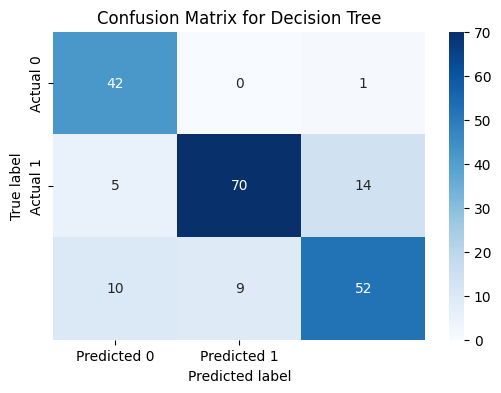

------------------------------------------------------------------


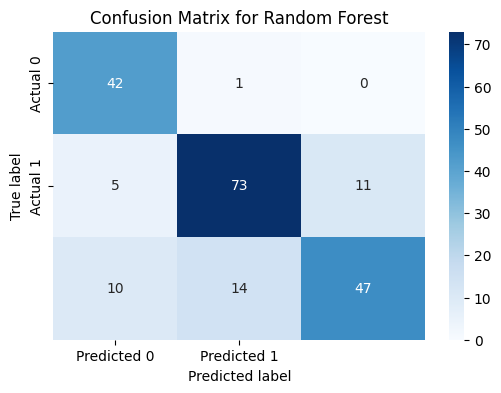

In [24]:
# Generate visualizations to compare both algorithms
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Confusion matrices
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")
print("------------------------------------------------------------------")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")